# **Data Analysis Of Netflix Data**

### 1.Importing the Required modules for Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### 2.Loading the Dataset
from the CSV file and Displaying first 5 rows

In [ ]:

data = pd.read_csv('/content/netflix1.csv')
data.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,25-09-2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,24-09-2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,24-09-2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,22-09-2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,24-09-2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8782 entries, 0 to 8781
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8782 non-null   object
 1   type          8782 non-null   object
 2   title         8782 non-null   object
 3   director      8782 non-null   object
 4   country       8782 non-null   object
 5   date_added    8782 non-null   object
 6   release_year  8782 non-null   int64 
 7   rating        8782 non-null   object
 8   duration      8782 non-null   object
 9   listed_in     8782 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.2+ KB


There are total 8798 records and 10 columns were found.

In [ ]:
data.describe()

,release_year
count,8782.000000
mean,2014.182305
std,8.829357
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### 3.Data cleaning

Some Data cleaning process was done by MS Excel as follows

1.Handling the Null Values - 8 (removed)

2.Handling Duplicates - 8 ( removed)

Available records : 8782


i.Checking the Null Values

In [ ]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


No null values found.Now, checking the duplicated values

In [ ]:
data.duplicated().sum()

0

No duplicated values found.

Checking the Data types.

Converting Date_added column datatype from string to datetime datatype.

In [ ]:
# coverting to date
data['date_added'] = pd.to_datetime(data['date_added'])

In [ ]:
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8777,s8748,TV Show,Yunus Emre,Not Given,United States,2018-12-15,2016,TV-G,1 Season,Reality TV
8778,s8750,TV Show,Zak Storm,Not Given,Turkey,2017-08-01,2014,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Thrillers"
8779,s8756,TV Show,Zindagi Gulzar Hai,Not Given,United States,2016-11-01,2010,TV-14,3 Seasons,"Crime TV Shows, Docuseries"
8780,s8759,TV Show,Yoko,Not Given,United Kingdom,2019-02-01,2017,TV-PG,1 Season,"British TV Shows, Docuseries"


### 4. The Exploratory Data Analysis

**1.Content type analysis**

*   Count and percentage of Movies vs. TV Shows.
*   Trends in the number of Movies and TV Shows added over time.

In [ ]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


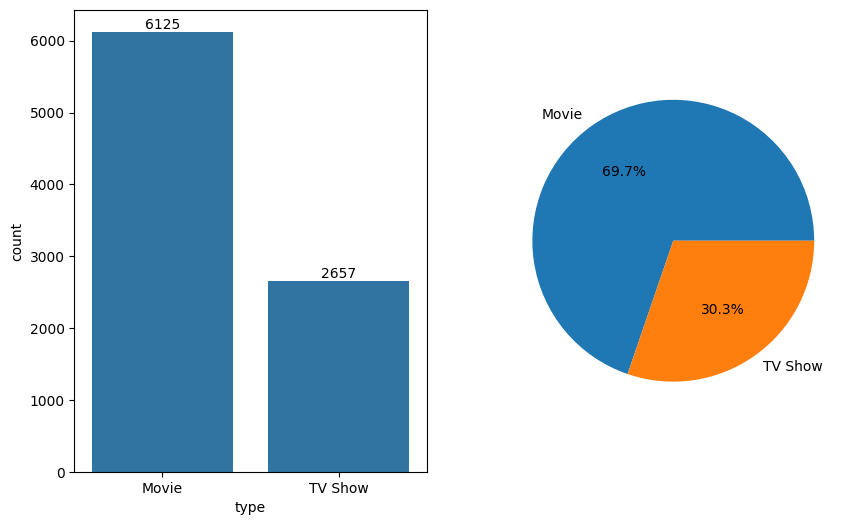

In [ ]:
from typing import Container
plt.subplots(1,2,figsize = (10,6))
plt.subplot(1,2,1)
ax = sns.countplot(data,x = data['type'])
ax.bar_label(ax.containers[0])
plt.subplot(1,2,2)
plt.pie(data['type'].value_counts(),labels = data['type'].value_counts().index,autopct = '%1.1f%%')
plt.show()

There are 6125 movies and 2657 Tv show
There are in total 69.7% of Movies and 30.3% of TV shows.

### 2.Time-Based Analysis
Trend of new content added over the years.

Monthly or seasonal patterns in adding content.

Most common years for content release.

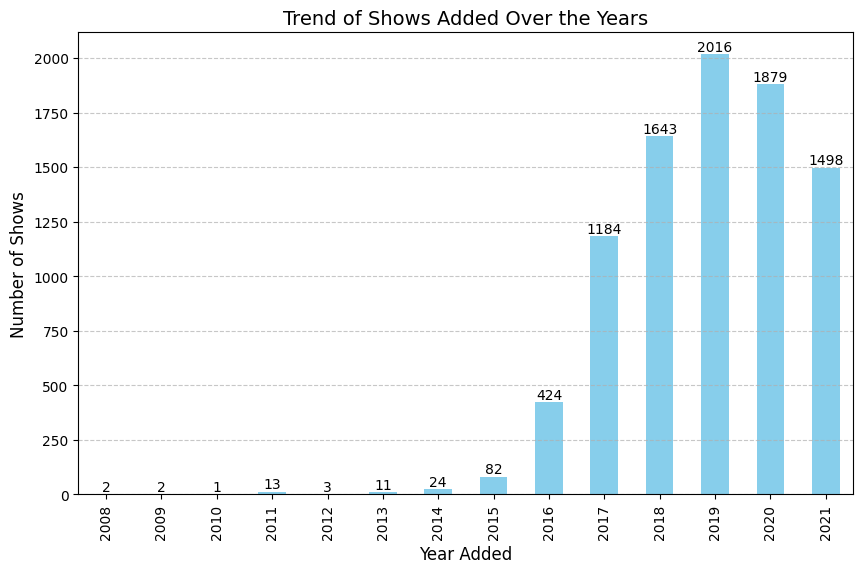

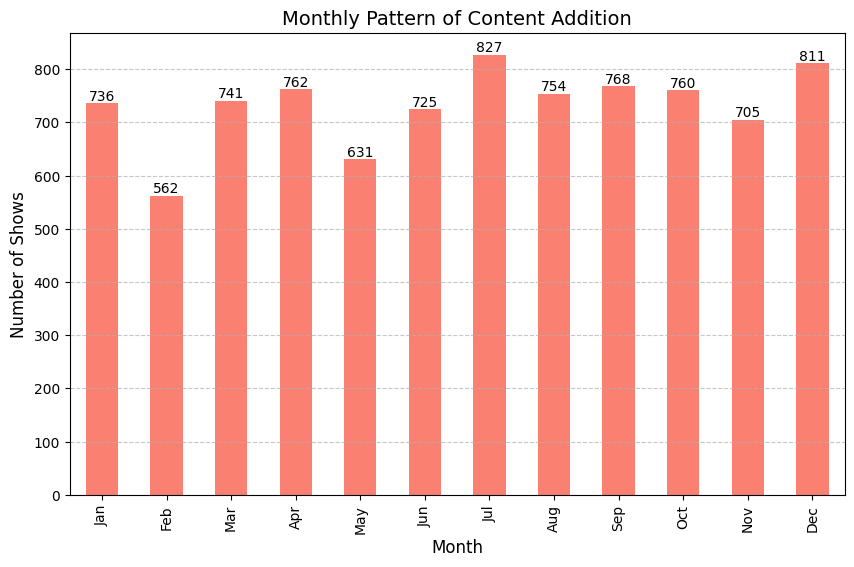

In [ ]:
# Extract year and month
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

# Trend of shows added over the years
shows_added_by_year = data['year_added'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
lable1=shows_added_by_year.plot(kind='bar', color='skyblue')
lable1.bar_label(lable1.containers[0])
plt.title('Trend of Shows Added Over the Years', fontsize=14)
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Number of Shows', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Monthly pattern of content addition
monthly_pattern = data['month_added'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
l1 = monthly_pattern.plot(kind='bar', color='salmon')
l1.bar_label(l1.containers[0])
plt.title('Monthly Pattern of Content Addition', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Shows', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.show()


By observing the plot from 2015 the graph were increasing.

From the above graph we can observe there were more number of content was added in the year 2019. This may due to pandemic situation leads to prefer more online content by the people.

So, In 2019 more number of content was added when compared to other years of data.

It was recorded that in July months more number of content was added.

### 3.Country Analysis
Top countries producing Netflix content.

Analysis of content type (Movies or TV Shows) by country.

Country-wise distribution of genres.

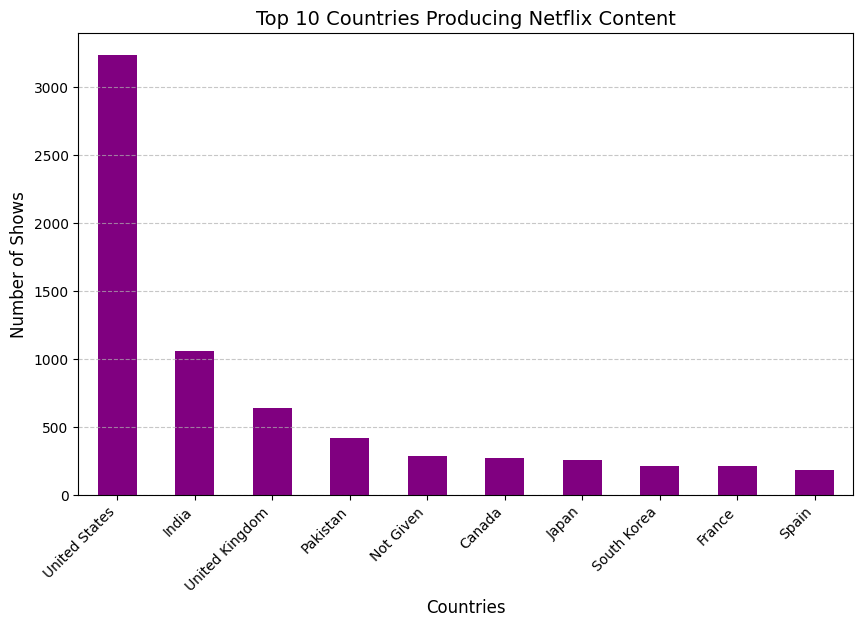

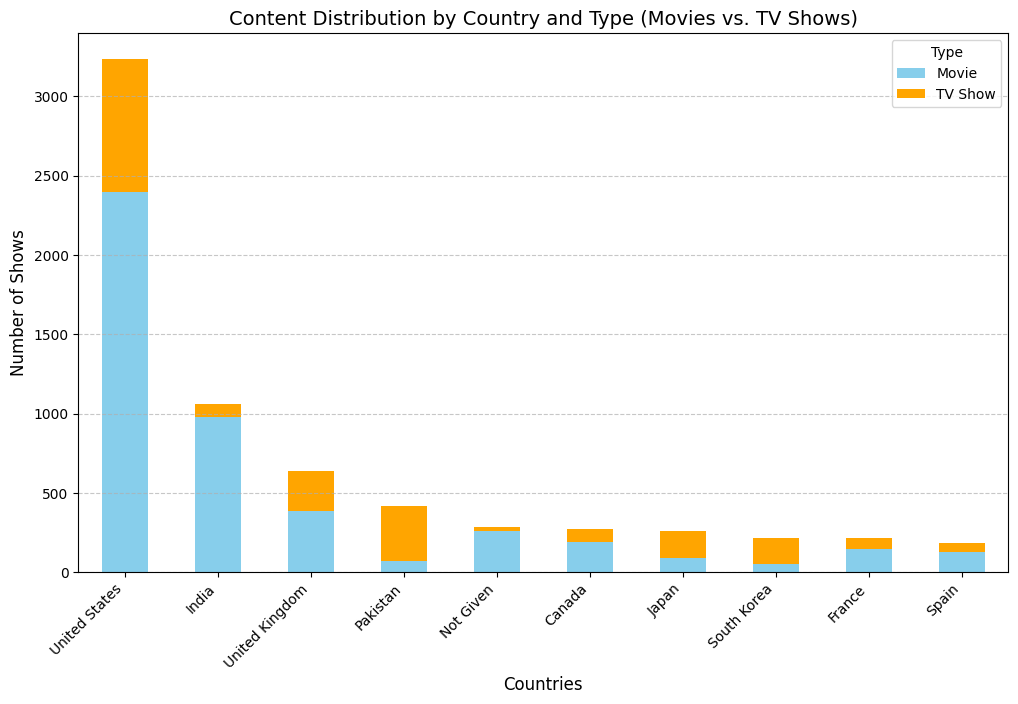

In [ ]:
# Count of top 10 countries producing content
top_countries = data['country'].value_counts().head(10)

# Bar chart for top countries
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='purple')
plt.title('Top 10 Countries Producing Netflix Content', fontsize=14)
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Number of Shows', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Country distribution by type (Movies vs. TV Shows)
country_type_distribution = data.groupby(['country', 'type']).size().unstack(fill_value=0)
top_country_types = country_type_distribution.loc[top_countries.index]

# Stacked bar chart for country distribution by type
top_country_types.plot(kind='bar', stacked=True, figsize=(12, 7), color=['skyblue', 'orange'])
plt.title('Content Distribution by Country and Type (Movies vs. TV Shows)', fontsize=14)
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Number of Shows', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


From the visualisation we can observe that

*   United states producing huge number of content when compared to other countries.
*   India secures second place in rank of producing more entertainment content.


*   from the second plot, US holds first place to produce both movies and TV shows.
*   Surprisingly, Pakistan ranked second in producing more TV shows than both India and the UK.





### 4.Rating Analysis
Distribution of maturity ratings (e.g., TV-MA, PG-13).

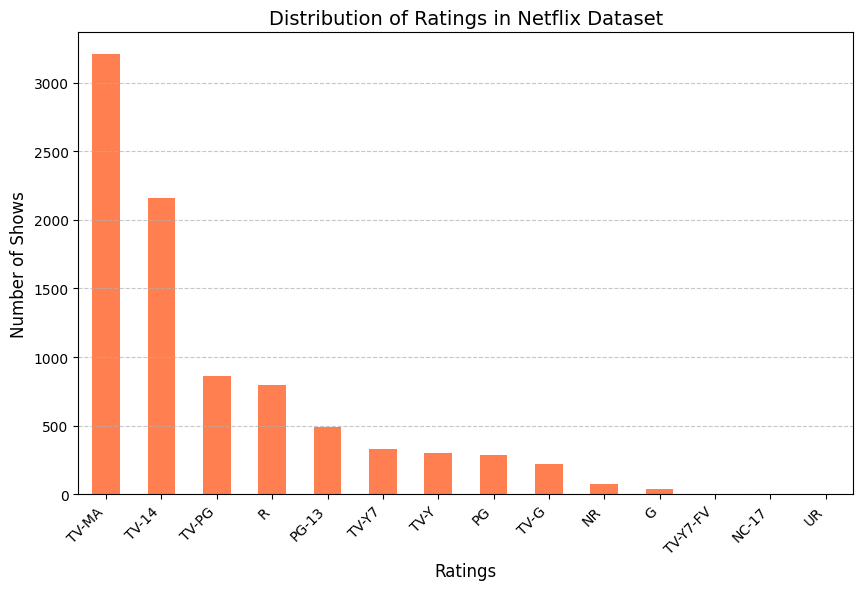

In [ ]:
# Count the distribution of ratings
rating_distribution = data['rating'].value_counts()

# Bar chart for rating distribution
plt.figure(figsize=(10, 6))
rating_distribution.plot(kind='bar', color='coral')
plt.title('Distribution of Ratings in Netflix Dataset', fontsize=14)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Number of Shows', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


From the above graph we can get to know TV-MA has more number of shows 3207.

2158 ratings of TV-14 was recorded.